In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [2]:
url="https://en.wikipedia.org/wiki/List_of_largest_companies_in_India"
page=requests.get(url)
page

<Response [200]>

In [3]:
soup=BeautifulSoup(page.text,"html")

In [4]:
table=soup.find("table",class_="wikitable sortable")

In [5]:
titles=table.find_all("th")

In [6]:
title=[i.text.strip() for i in titles]

In [7]:
mydf=pd.DataFrame(columns=title)

In [8]:
row_data=table.find_all("tr")[1:]

In [9]:
for row in row_data:
    r_data=row.find_all("td")
    individual_row_data=[i.text.strip() for i in r_data]
    length=len(mydf)
    mydf.loc[length]=individual_row_data

In [10]:
cols = ["Revenue(billions US$)", "Profit(billions US$)", "Assets(billions US$)", "Value(billions US$)"]
mydf[cols] = mydf[cols].apply(pd.to_numeric, errors='coerce')

In [11]:
vari=mydf.groupby("Industry")["Revenue(billions US$)"].sum()

<Axes: title={'center': 'Revenue of Major Indian Industries'}, xlabel='Industry', ylabel='Revenue in billions US$'>

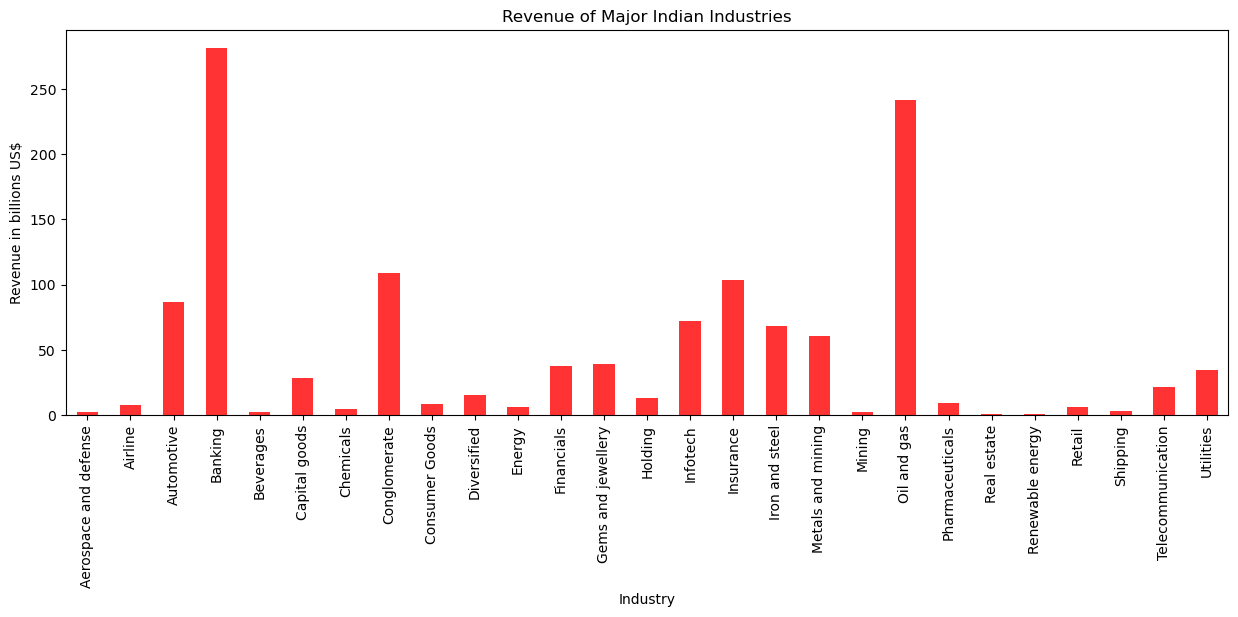

In [12]:
vari.plot(kind="bar",color="red",figsize=(15,5),alpha=0.8,xlabel="Industry",ylabel="Revenue in billions US$",title="Revenue of Major Indian Industries")

In [13]:
mydf.to_csv("TopCompanies.csv",index=False)